In [1]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Data Processing

In [2]:
df = pd.read_csv("data/mushrooms.csv")

In [3]:
Y = (df["class"] == "p").astype(int).to_numpy()

In [4]:
len(Y)

8124

In [5]:
df = df.drop(["class"], axis=1)

In [6]:
onehot_encoded = pd.get_dummies(df, df.columns, dtype=int)

In [7]:
X = onehot_encoded.to_numpy()

In [8]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, train_size=0.3)

In [9]:
Y_train.shape, Y_test.shape

((5687,), (2437,))

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
clf = DecisionTreeClassifier(max_depth=6)

In [12]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

In [13]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



[Text(0.5882352941176471, 0.9285714285714286, 'x[27] <= 0.5\ngini = 0.499\nsamples = 5687\nvalue = [2945, 2742]'),
 Text(0.35294117647058826, 0.7857142857142857, 'x[53] <= 0.5\ngini = 0.291\nsamples = 3230\nvalue = [570, 2660]'),
 Text(0.23529411764705882, 0.6428571428571429, 'x[55] <= 0.5\ngini = 0.132\nsamples = 2835\nvalue = [201.0, 2634.0]'),
 Text(0.17647058823529413, 0.5, 'x[22] <= 0.5\ngini = 0.046\nsamples = 2697\nvalue = [63, 2634]'),
 Text(0.11764705882352941, 0.35714285714285715, 'x[25] <= 0.5\ngini = 0.02\nsamples = 2661\nvalue = [27, 2634]'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 2634\nvalue = [0, 2634]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.29411764705882354, 0.5, 'gini = 0.0\nsamples = 138\nvalue = [138, 0]'),
 Text(0.47058823529411764, 0.6428571428571429, 'x[65] <= 0.5\ngini = 0.

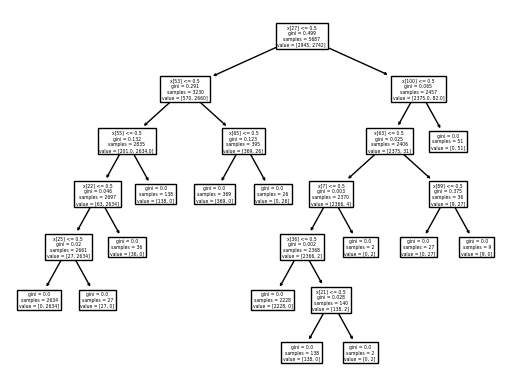

In [14]:
plot_tree(clf)

# KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf = KNeighborsClassifier(n_neighbors=20)

In [17]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [18]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



# Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB

In [20]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [21]:
gnb.fit(X_train, Y_train)
mnb.fit(X_train, Y_train)
cnb.fit(X_train, Y_train)
bnb.fit(X_train, Y_train)

BernoulliNB()

In [22]:
y_pred = gnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1263
           1       0.93      1.00      0.96      1174

    accuracy                           0.96      2437
   macro avg       0.97      0.97      0.96      2437
weighted avg       0.97      0.96      0.96      2437



In [23]:
y_pred = mnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1263
           1       0.99      0.91      0.95      1174

    accuracy                           0.95      2437
   macro avg       0.96      0.95      0.95      2437
weighted avg       0.96      0.95      0.95      2437



In [24]:
y_pred = cnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1263
           1       0.99      0.91      0.95      1174

    accuracy                           0.95      2437
   macro avg       0.96      0.95      0.95      2437
weighted avg       0.96      0.95      0.95      2437



In [25]:
y_pred = bnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1263
           1       0.98      0.89      0.93      1174

    accuracy                           0.94      2437
   macro avg       0.94      0.94      0.94      2437
weighted avg       0.94      0.94      0.94      2437



# Simple NN

In [29]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import backend as K, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

In [33]:
X.shape

(8124, 117)

In [38]:
# build model
mlp_model = Sequential()

layers = [ 
    Input(shape = (len(X_train[0],))),
    
    Dense(117, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.3), 
    
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    
    Dense(1, activation='softmax'),
]

mlp_model = tf.keras.Sequential(layers)
mlp_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['categorical_accuracy'])
mlp_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 117)               13806     
                                                                 
 batch_normalization_18 (Ba  (None, 117)               468       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 117)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                7552      
                                                                 
 batch_normalization_19 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 64)               

Epoch 1/100
72/72 [==============================] - 2s 5ms/step - loss: 0.3581 - categorical_accuracy: 1.0000 - val_loss: 0.1831 - val_categorical_accuracy: 1.0000
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 0.0999 - categorical_accuracy: 1.0000 - val_loss: 0.0386 - val_categorical_accuracy: 1.0000
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.0474 - categorical_accuracy: 1.0000 - val_loss: 0.0091 - val_categorical_accuracy: 1.0000
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 0.0298 - categorical_accuracy: 1.0000 - val_loss: 0.0029 - val_categorical_accuracy: 1.0000
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 0.0177 - categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_categorical_accuracy: 1.0000
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.0122 - categorical_accuracy: 1.0000 - val_loss: 7.3775e-04 - val_categorical_accuracy: 1.0000


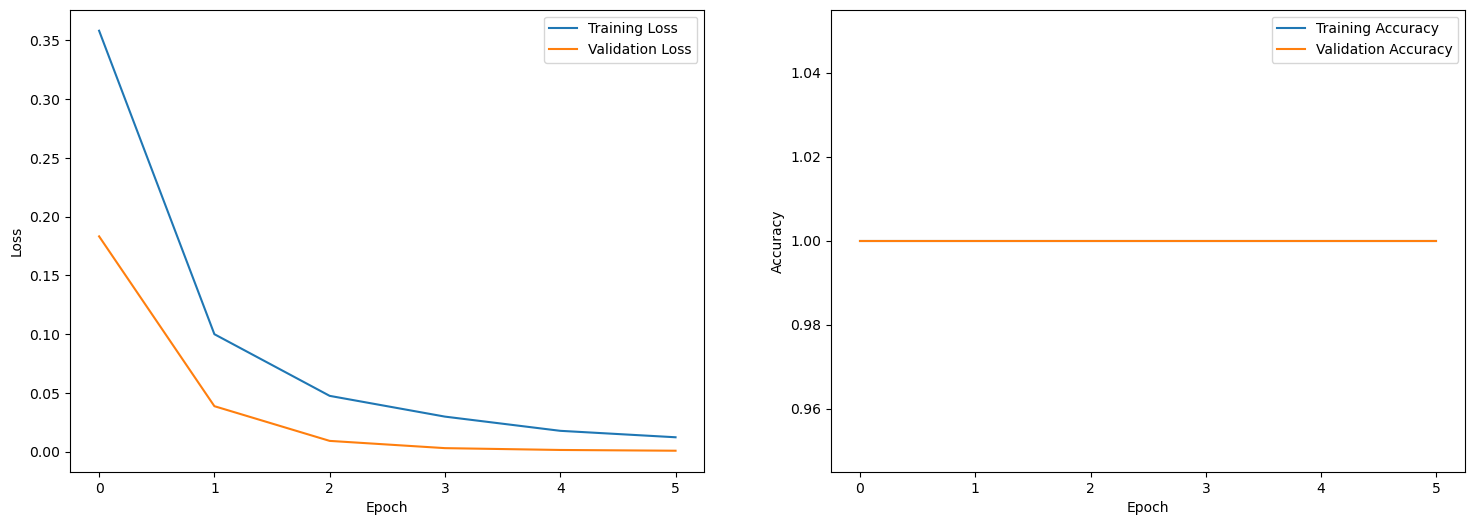

In [39]:
def plot_network_history(network_history):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].plot(network_history.history["loss"], label="Training Loss")
    axes[0].plot(network_history.history["val_loss"], label="Validation Loss")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    axes[1].plot(network_history.history["categorical_accuracy"], label="Training Accuracy")
    axes[1].plot(network_history.history["val_categorical_accuracy"], label="Validation Accuracy")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()
    plt.show()
    
# callbacks
es = keras.callbacks.EarlyStopping(
    monitor="val_categorical_accuracy",
    min_delta=0.01, 
    patience=5, 
    restore_best_weights=True
)

# train model
network_history = mlp_model.fit( 
    X_train, 
    Y_train, 
    epochs = 100,
    validation_split = 0.2,
    batch_size = 64,
    callbacks = [es]
)

# observe the training
plot_network_history(network_history)

In [41]:
y_pred = mlp_model.predict(X_test)

77/77 [==============================] - 0s 962us/step


In [42]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1263
           1       0.48      1.00      0.65      1174

    accuracy                           0.48      2437
   macro avg       0.24      0.50      0.33      2437
weighted avg       0.23      0.48      0.31      2437



/home/lehoangchibach/anaconda3/envs/gpu11_/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lehoangchibach/anaconda3/envs/gpu11_/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lehoangchibach/anaconda3/envs/gpu11_/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif